# [Goulib](../notebook.ipynb).geom
Vector, matrix and quaternion operations + line, arc, circle entities for use in 2D and 3D graphics applications.


In [17]:
from Goulib.notebook import *
from Goulib.geom import *
import sys,inspect
h('geom defines the following classes : %s'%dict(inspect.getmembers(sys.modules['Goulib.geom'], inspect.isclass)).keys())

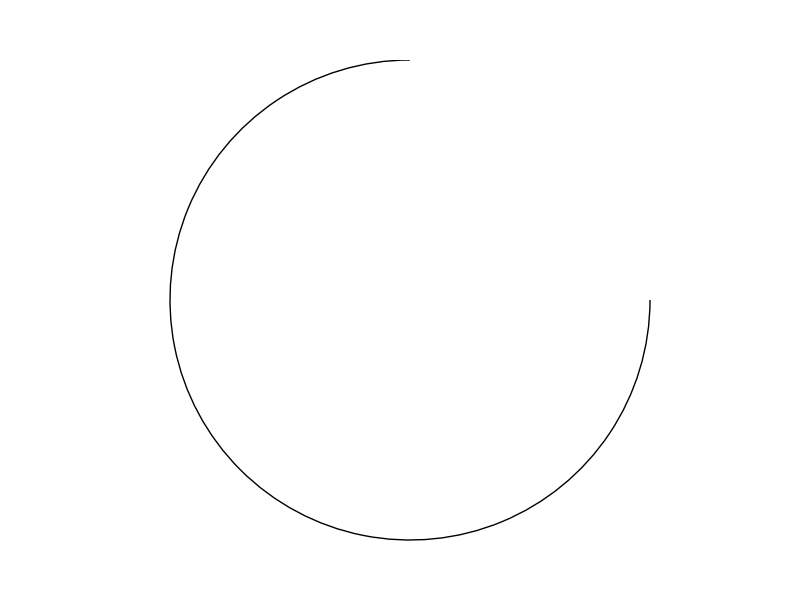

In [18]:
Arc2((0,0),(0,1),(1,0)) #does not render in IPython

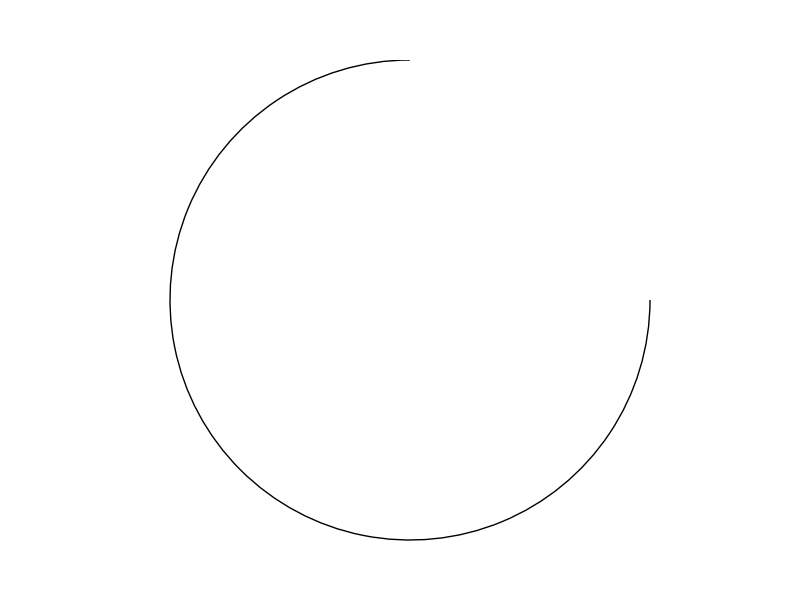

In [19]:
from Goulib.drawing import * #adds rendering (and more) to Geom
a=Arc2((0,0),(0,1),(1,0)) #same class is now rendered in IPython
a

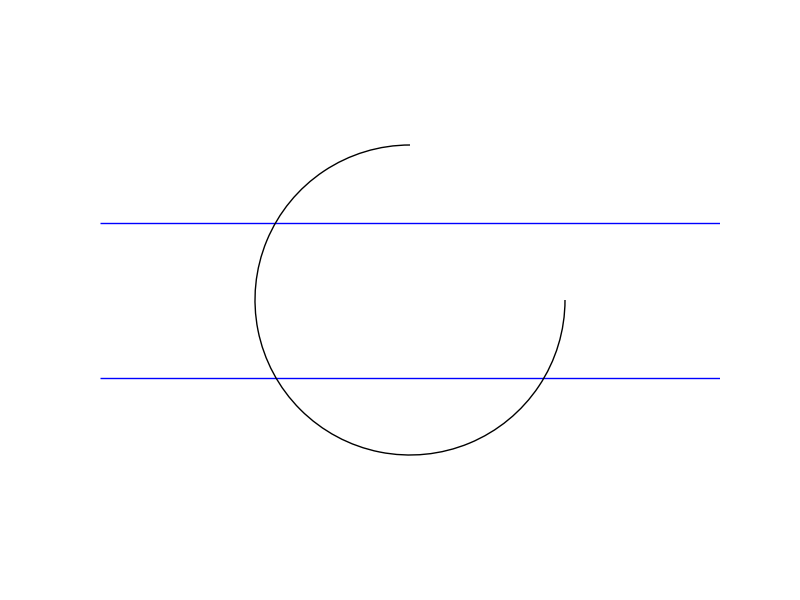

In [20]:
l1=Segment2((-2,.5),Vector2(4,0)) #horizontal at y=0.5
l2=Segment2((-2,-.5),Vector2(4,0)) #horizontal at y=-0.5
lines=Group([l1,l2])
lines.color='blue'
Group([lines,a])

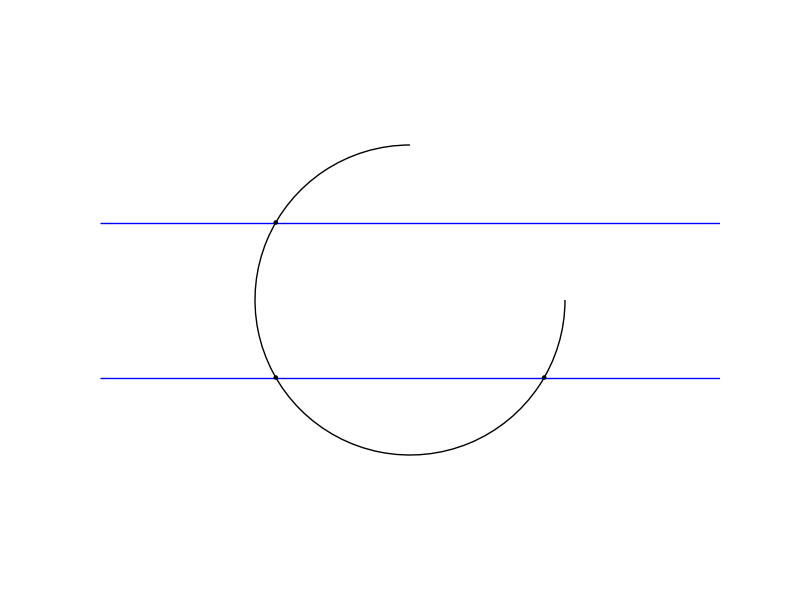

In [21]:
pts=Group([i[0] for i in lines.intersect(a)]) # list of intersection points
Group([lines,a,pts])

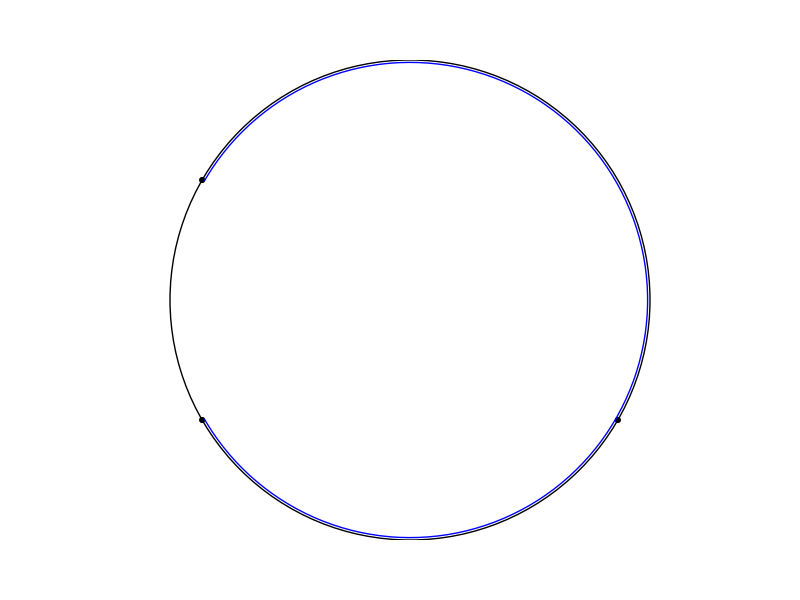

In [22]:
c1=circle_from_3_points(*pts) # classic
a1=arc_from_3_points(*pts) # not trivial ;-)
a1.r*=.99
a1.color='blue'
Group([pts,c1,a1])

# [Goulib](../notebook.ipynb).drawing
vector graphics in .dxf, .svg and .pdf formats based on Geom

In [23]:
from Goulib.drawing import *
import inspect
h('drawing adds more classes to geom : %s'%dict(inspect.getmembers(sys.modules['Goulib.drawing'], inspect.isclass)).keys())

In [34]:
c1=Circle(Point2(4,4),1)
#drawing Entities support colors and othe graphic attributes
c1.color='blue'
c1.width=5
c1.fill='cyan'
r1=Rect((0,0),(-1,1))
r2=Rect((1,-1),(2,2))
c2=Circle(Point2(0,2),.5)

,
,

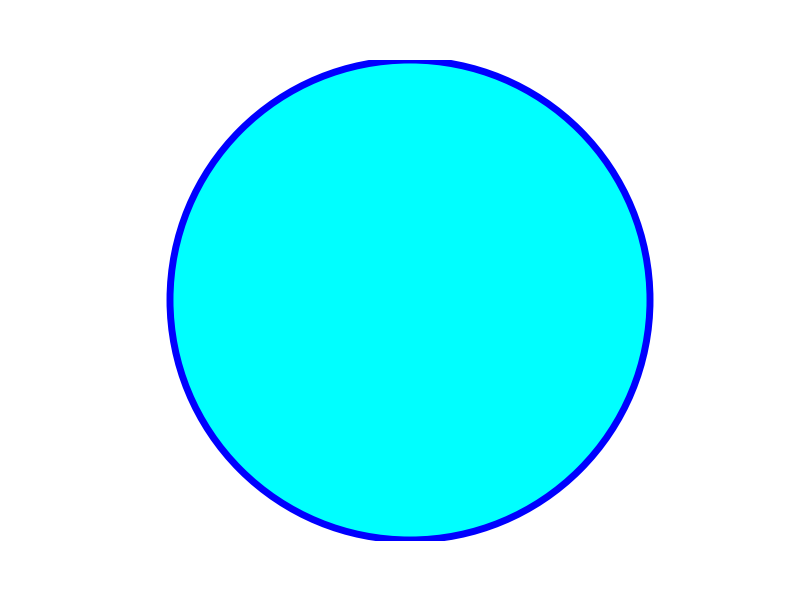
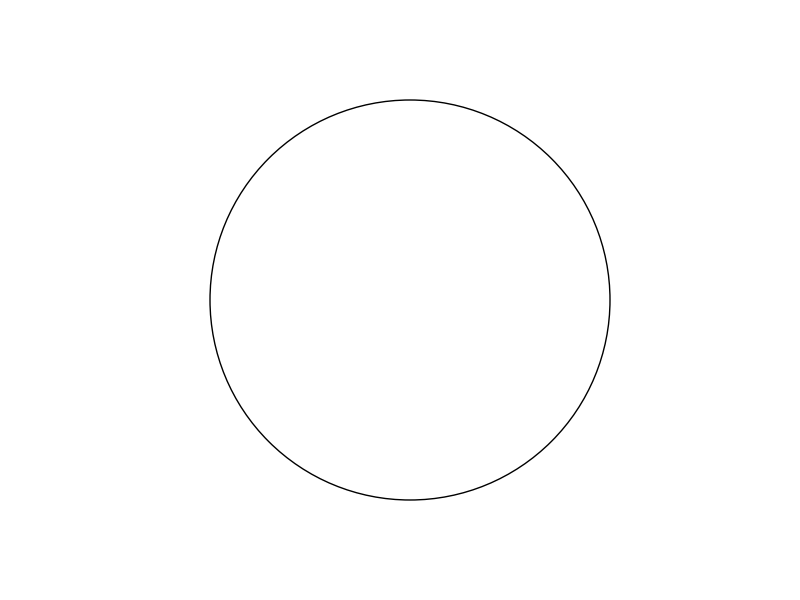
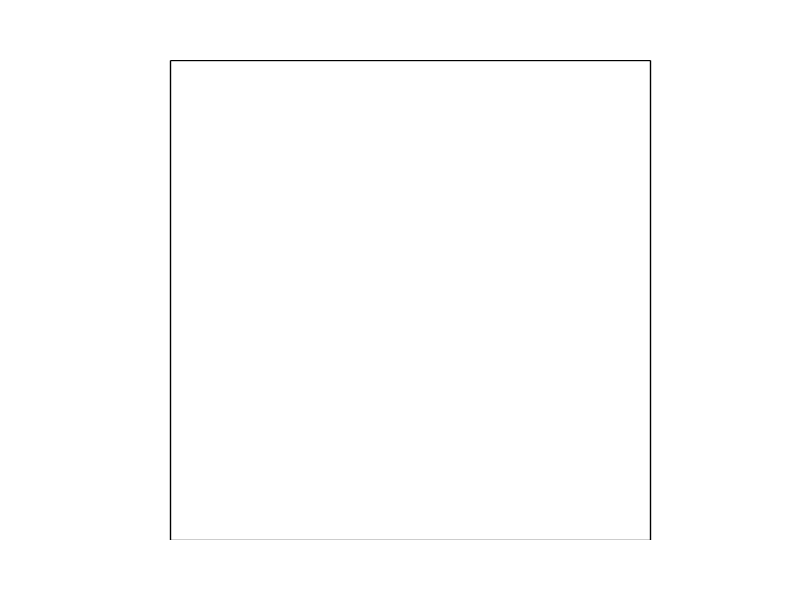
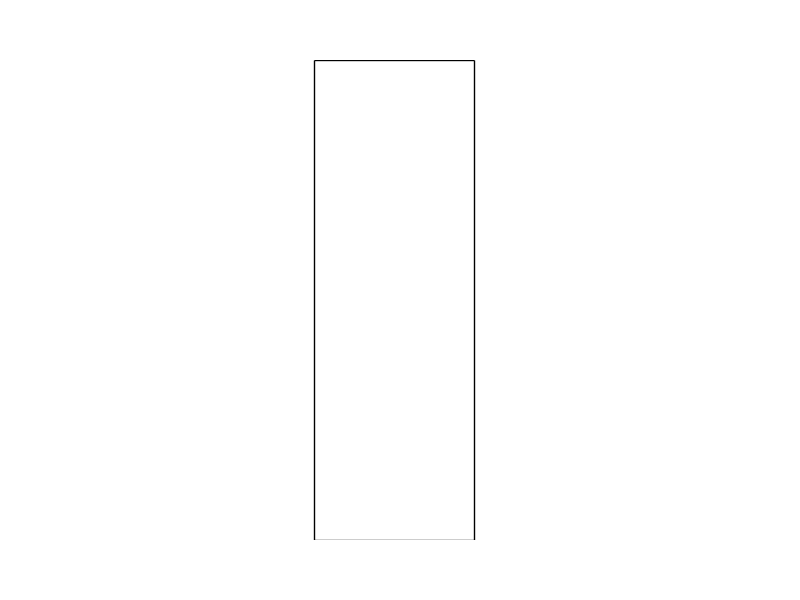

In [35]:
from Goulib.table import Table
Table([[c1,c2],[r1,r2]]) # Entities have an HTML representation for tables

Geom offers many geometric constructs

In [ ]:
s1=r1.connect(r2)
s1.color='red'
s2=r2.connect(c1)
s2.color='red'
s3=c1.connect(c2)
s3.color='red'

Geom entities and others defined in Drawing can be grouped :

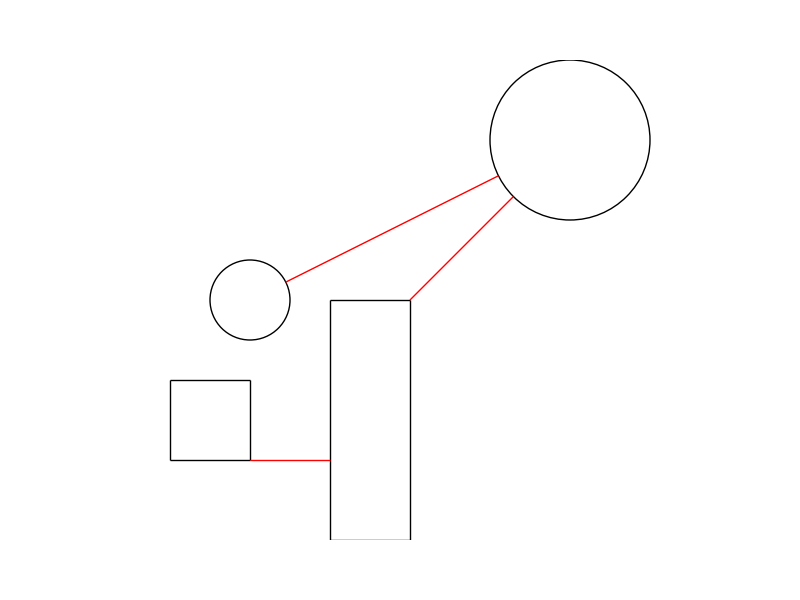

In [26]:
g=Group([r1,r2,c1,c2,s1,s2,s3])
g

Groups can be handled as entities :

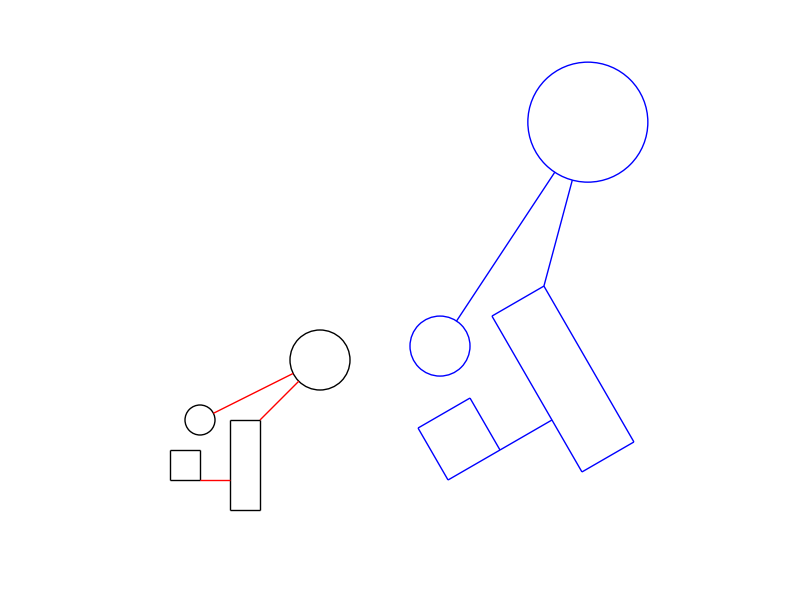

In [27]:
g2=Trans(scale=2, offset=(10,1), rotation=30)*g
g2.color='blue'
h(g.distance(g2))
Group([g,g2]) #group of groups

Drawing objects can be read/saved from/to various formats including pdf, svg and dxf 

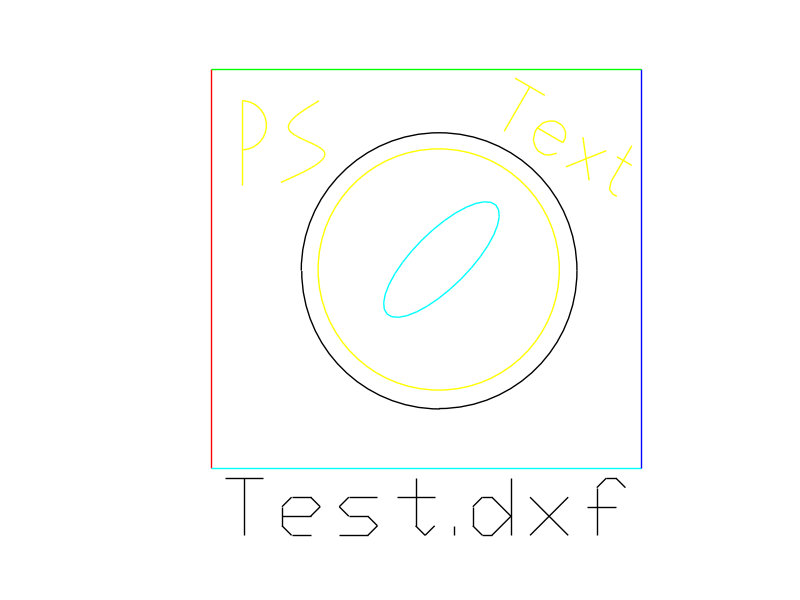

In [28]:
Drawing('../tests/data/drawing.pdf')

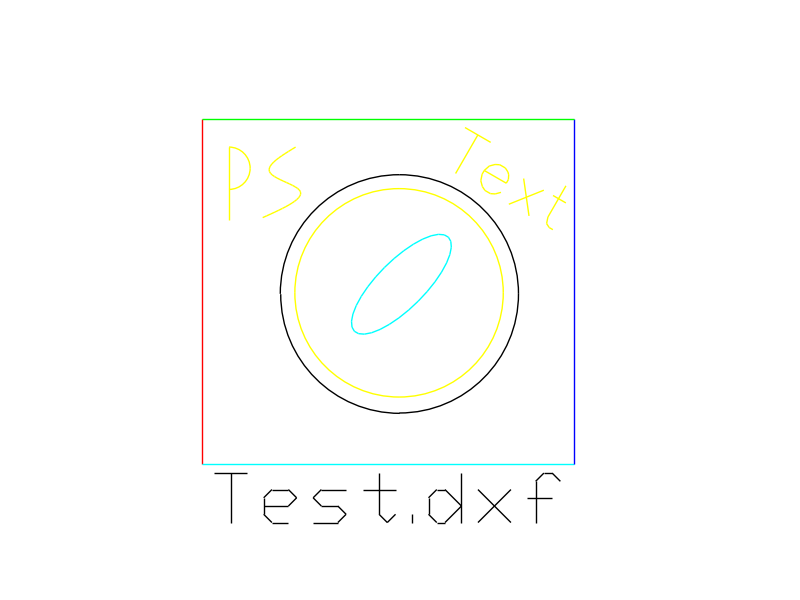

In [29]:
Drawing('../tests/data/drawing.svg')

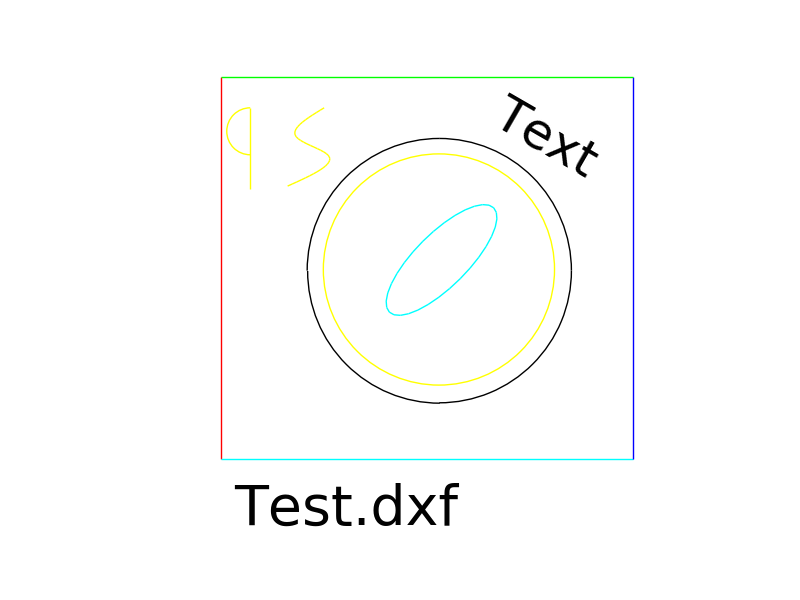

In [30]:
Drawing('../tests/data/drawing.dxf')

Drawing also extends geom to allow geometric constructions


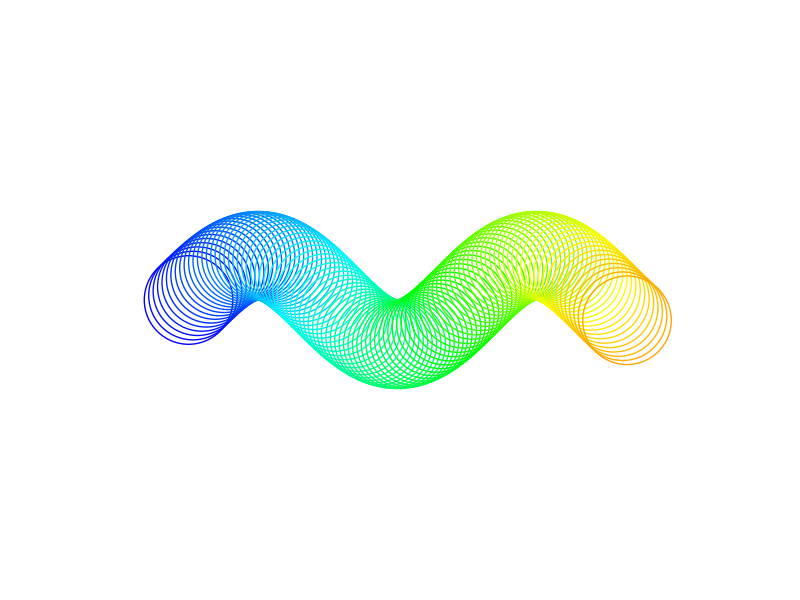

In [31]:
from Goulib.colors import color_range
d=Drawing()
for i,color in enumerate(color_range(100,'blue','orange')):
    circle=Circle((i*.1,sin(.1*i)),1)
    circle.color=color
    d.append(circle)
d